# Student Performance

## Summary

**In this box, write a summary of what you did and what you learned. Often, this will be the only thing that anyone else reads!.**

We fit a Linear Model using Ordinary Least Squares that predicts Test Performance with very high accuracy. 98% of the variance is explained and our predictions correlate with true scores with a value of 0.99, nearly perfect correlation. MAE and RMSE are similarly low: The MAE is only 1.65 points and RMSE of 2.08 points.

We used the same model for a hypothesis test and found that all of our features (hours studied, previous test scores, extracurricular activities, hours of sleep, and number of practice questions answered) had a significant positive effect on the students' final test scores. The assumptions for the hypothesis hold and we are confident that our results are rigorous.

## Import Packages

In [1]:
# import the usual packages for loading and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
# DO NOT CHANGE THIS CELL! IT LOADS THE DATA FOR YOU!
data = pd.read_csv('https://raw.githubusercontent.com/JohnTheQuantYoutube/Bootcamp/refs/heads/main/Week4/Student_Performance.csv')

In [ ]:
# take a quick look at the data
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# fix any problems you immediately see in the dataset
data.columns = ['hours_studies', 'previous_score', 'extracurriculars', 'sleep_hours', 'practice_questions', 'performance']

In [ ]:
# check for missing values
data.isna().sum()

hours_studies         0
previous_score        0
extracurriculars      0
sleep_hours           0
practice_questions    0
performance           0
dtype: int64

**In this cell, give your initial thoughts on the data!**

There are no missing values, though there may be some that are just coded as something else, like in the diabetes data where people had 0 bloodpressure. 10,000 rows is a good sample size so we shouldn't have any problems with too few values or missing combinations of variables. It also came in as the appropriate data types, which is nice. We'll have to encode the `extracurriculars` column somehow before modelling.

## View and Explore the Data

Before we go any further, we need to know what all of the columns mean. We cannot interpret the results if we don't know what the columns mean. You can check the documentation for the dataset here https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression.

**In this cell, explain what each column of the dataset means.**

1. hours_studies - This column tells us the number of hours that the student studied for the final exam, rounded to the nearest whole hour.
2. previous_score - This column tells us how well the student did on the previous exam. It is the same as `performance`, but on the previous test rather than the test we're interested in.
3. extracurriculars - This column tells us whether the student engages in extracurricular activities. It is binary, yes or no.
4. sleep_hours - This column tells us how much sleep the student got the night before the big exam, rounded to the nearest whole hour.
5. practice_questions - This column tells us how many practice questions the student did before the test. I expect this to be highly correlated with `hours_studied` and possibly negatively correlated with `previous_score`. We should watch out for that.
6. `performance` - This column tells us how well the student did on the final exam. This is our target, what we want to predict, or our **dependent variable**, what we want to *explain*.

## Train/Test Split

Before we do anything to manipulate our data, we want to split it into training and testing sets! If we make any decisions after seeing the testing set, then it doesn't count as a test any more! It's like cheating. You're not allowed to see anything about the test until test time. So split now, then we'll transform and scale and model.

Choose a good proportion to use for testing! It should be enough that you get a good idea of model performance, but not so much that training suffers.

In [ ]:
# import from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# split into train test set
X = data.drop('performance', axis=1)
y = data['performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# check shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 5)
(8000,)
(2000, 5)
(2000,)


### Visualize Data

There are a number of ways to visualize data. You choose which visualizations to do based on what you want to learn from them.

**What do you want to learn at this point in the project?**

At this point, I want to learn if there is much correlation between any of the columns. I'd also like to know the distributions of the features, so I can transform them for modelling if I need to.

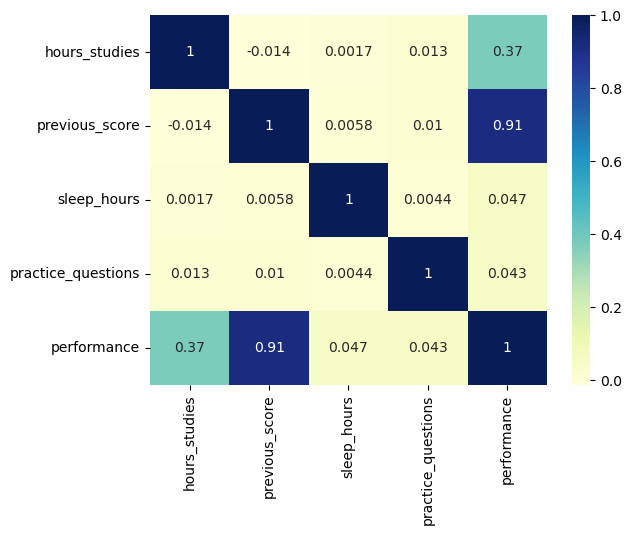

In [ ]:
# make the right visualization for your purposes here
training_set = pd.concat([X_train, y_train], axis=1)
sns.heatmap(training_set.corr(numeric_only=True), cmap='YlGnBu', annot=True);

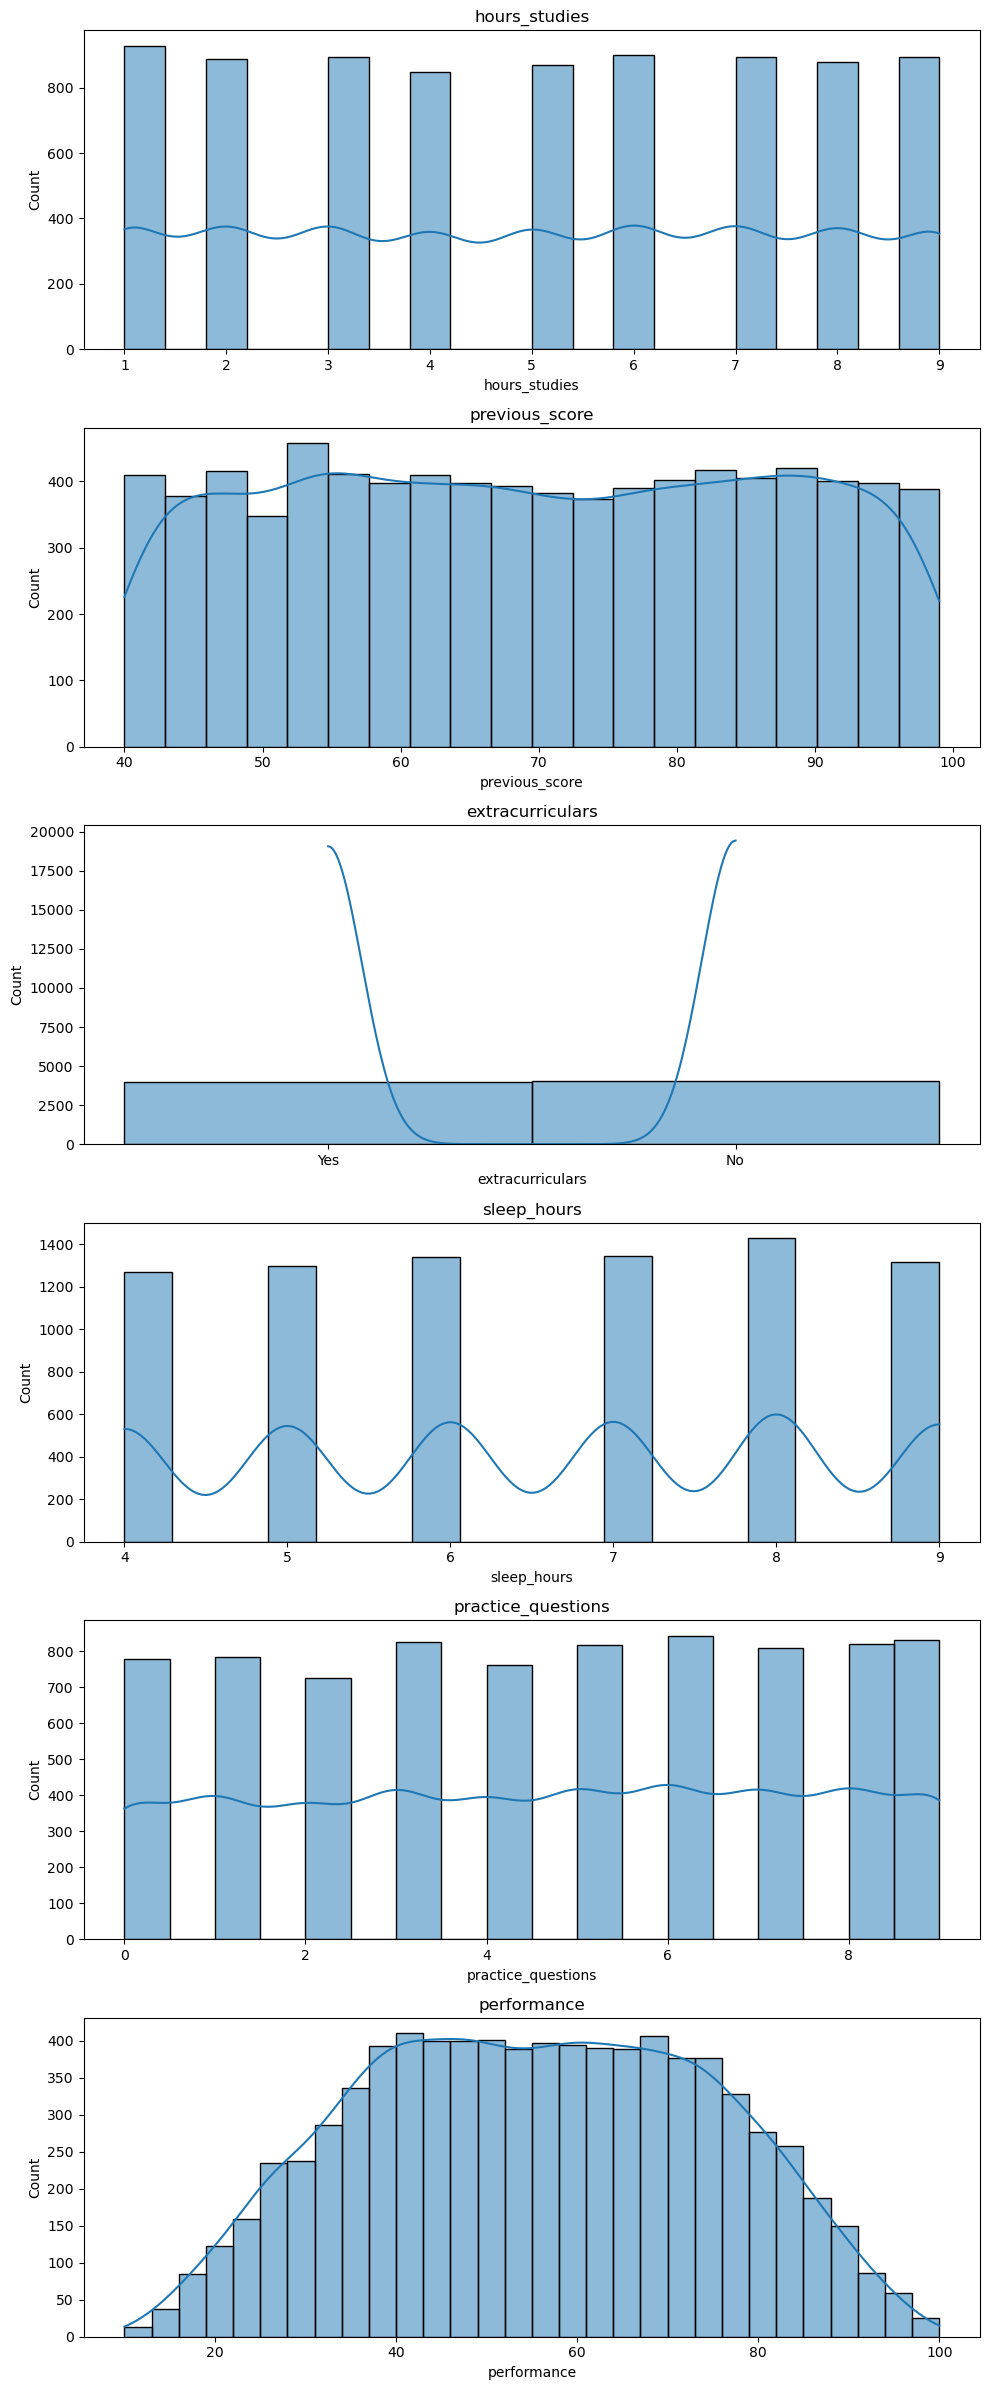

In [ ]:
fig, ax = plt.subplots(nrows=training_set.shape[1], figsize=(10,4*training_set.shape[1]))
for i, col in enumerate(training_set.columns):
    sns.histplot(training_set[col], kde=True, ax=ax[i])
    ax[i].set_title(col)
fig.tight_layout();

**What did you learn from your visualizations?**

Interestingly, the data is already pretty symmetrical and there isn't much correlation between features. I'm pretty surprised but I don't think we need to do any transformation before just scaling the features (except one-hot encoding!).

## Transform the Data

Remember, in general we want all of the features to be symmetrical. Specifically we want them all to be normally distributed, with a bell-curve shape. When we can't have a bell-curve, we want them to be uniformly distributed, like a big rectangle. Go through each column and do whatever transformations you need in order to make the features symmetrical and ready for scaling/encoding.

In [ ]:
# perform transformations here
print("HA! There's no transformation needed!")

HA! There's no transformation needed!


## Scaling and Encoding

Once all the features are nice and symmetrical, we want to make them all centered over zero and with the same spread (preferably such that the standard deviation is 1). If we have any categorical columns, we need to encode them as well. I'm going to use one-hot encoding, but you're free to use a different encoder if you like.

In [ ]:
# load whatever you need (probably from sklearn)
from sklearn.preprocessing import StandardScaler

In [ ]:
# scale and encode data here
scaler = StandardScaler()
train_scaled = scaler.fit_transform(training_set.select_dtypes('number'))
train_scaled = pd.DataFrame(train_scaled,
                            columns=training_set.select_dtypes('number').columns,
                            index = training_set.select_dtypes('number').index)

# this next line does one-hot encoding using a list comprehension
# since this dataset only has one categorical column that is binary, I like this way better than pd.get_dummies or sklearn's OneHotEncoder
train_scaled['extracurriculars'] = [1 if i.lower()=='yes' else 0 for i in training_set['extracurriculars']]

In [ ]:
# examine the scaled and encoded data
train_scaled.head()

,hours_studies,previous_score,sleep_hours,practice_questions,performance,extracurriculars
7014,-1.149122,0.086029,0.861681,-0.201127,-0.274460,1
3894,0.005629,1.182406,0.861681,0.843688,1.026759,1
4984,1.160380,0.489957,-0.909200,0.147145,0.870613,1
71,0.775463,-0.491011,-1.499494,0.843688,-0.066265,1
7814,1.160380,1.066998,0.861681,-0.897670,1.495198,0


In [ ]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 7014 to 5562
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_studies       8000 non-null   float64
 1   previous_score      8000 non-null   float64
 2   sleep_hours         8000 non-null   float64
 3   practice_questions  8000 non-null   float64
 4   performance         8000 non-null   float64
 5   extracurriculars    8000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 437.5 KB


In [ ]:
train_scaled.isna().sum()

hours_studies         0
previous_score        0
sleep_hours           0
practice_questions    0
performance           0
extracurriculars      0
dtype: int64

# Hypothesis Testing

## Research Questions

Hypothesis tests answer questions, so before we can run a hypothesis test, we need to ask a good question. Keep the rules of Research Questions in mind and write a couple! I'll give you one, but you should write two of your own.

1. Did students who got more sleep get higher scores on the final exam?
2. **YOUR QUESTION HERE** Is there a positive relationship between doing practice problems and doing better on the exam?
3. **YOUR QUESTION HERE** Does taking part in extracurricular activities decrease a student's performance on tests?

## Hypotheses

Hypothesis testing can only test hypotheses. We need to translate our research questions into testable hypotheses. I'll convert my question and you do yours.

**Question 1:**
$$H_0:\:\: \alpha_{\text{sleep}} \le 0$$
$$H_1:\:\: \alpha_{\text{sleep}}>0$$

**Question 2:**
$$H_0:\:\: \alpha_{\text{practice problems}} \le 0$$
$$H_1:\:\: \alpha_{\text{practice problems}}>0$$

**Question 3:**
$$H_0:\:\: \alpha_{\text{extracurriculars}} < 0$$
$$H_1:\:\: \alpha_{\text{extracurriculars}} \ge 0$$

**Explain what your hypotheses mean in terms of the coefficients of a linear model.**

* Question 1: The null hypothesis is that the coefficient for `sleep_hours` will be less than or equal to zero. If the p-value is low enough, it means we found evidence that getting more sleep may help students get better test scores.
* Question 2: The null hypothesis is that the coefficient for `practice_problems` will be less than zero. If the p-value is low enough, it means that we have found evidence that doing more practice problems may help students get better test scores.
* Question 3: The null hypothesis is that the coefficient for `extracurriculars` is less than zero. If the p-value is low enough, it means that we have found evidence that taking part in extracurricular activities may help students perform better on tests.

## Run the Hypothesis Test

In [ ]:
# import the model from statsmodels
import statsmodels.api as sm

In [ ]:
# fit the model
X_train = train_scaled.drop('performance', axis=1)
y_train = train_scaled['performance']

# add a constant
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
test_results = model.fit()

In [ ]:
# view the summary table
test_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            performance   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.420e+05
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:03:08   Log-Likelihood:                 6639.6
No. Observations:                8000   AIC:                        -1.327e+04
Df Residuals:                    7994   BIC:                        -1.323e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0151      0.002     -9.083      0.000      -0.018      -0.012
hours_studies          0.3862      0.001    327.172      0.000       0.384       0.389
previous_score         0.9191      0.001    778.551      0.000       0.917       0.921
sleep_hours            0.0418      0.001     35.379      0.000       0.039       0.044
practice_questions     0.0285      0.001     24.106      0.000       0.026       0.031
extracurriculars       0.0305      0.002     12.903      0.000       0.026       0.035
==============================================================================
Omnibus:                        5.567   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.942
Skew:                           0.026   Prob(JB):                       0.0512
Kurtosis:                       3.123   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpret the Results

**In this cell, interpret the results of the hypothesis test. Answer the three research questions!**

1. The p-value for `sleep_hours` is very low and the coefficient is positive. Thus, we can "reject" the null hypothesis and say that we have found evidence that getting more sleep may help students perform better on exams.
2. The p-value for `practice_problems` is very low and the coefficient is positive. Thus, we can "reject" the null hypothesis and say that we have found evidence that doing more practice problems may help students perform better on exams.
3. The p-value for `extracurriculars` is very low and the coefficient is positive. Thus, we can "reject" the null hypothesis and say that we have found evidence that takinng part in extracurricular activities helps students get better test scores!

**HARD QUESTION: What percent of the variance was explained by our model? Google it!**

The *R-squared* metric in the summary table is considered synonymous with the *amount of variance* explained. Our is REALLY high, 98.9%. This might indicate that something has gone wrong with the model. We should be extra sure to check all of the assumptions and make sure we haven't done something wrong.

## Check the Assumptions

There are three assumptions of linear regression that we need to test:

1. Data should be normally distributed
2. Data should be homoscedastic
3. Features should be independent

### 1. Data Should be Normally Distributed

Check this assumption. There are a few ways to do this. Google it! Then pick at least one method and perform the check.

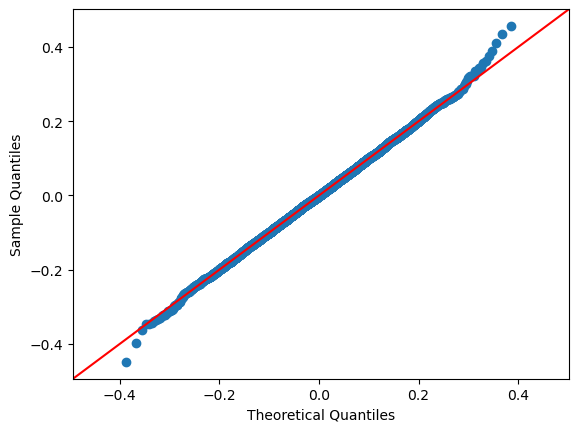

In [ ]:
# check for normality here
from statsmodels.graphics.gofplots import qqplot

qqplot(test_results.resid, loc=test_results.resid.mean(), scale=test_results.resid.std(), line='45');

In [ ]:
print(f'Mean of residuals: {test_results.resid.mean():.4f}')
print(f'Standard Deviation of residuals: {test_results.resid.std():.4f}')

Mean of residuals: -0.0000
Standard Deviation of residuals: 0.1055


**Does the assumption of normality hold for your data? Why or why not?**

The assumption of normality holds. The residuals fall nicely along the line in the qqplot and there's just a few points in the extremes that fall off the line.

### 2. Data should be homoscedastic

There are a number of ways to check for homoscedasticity. Google it! Choose at least one method and run the test!

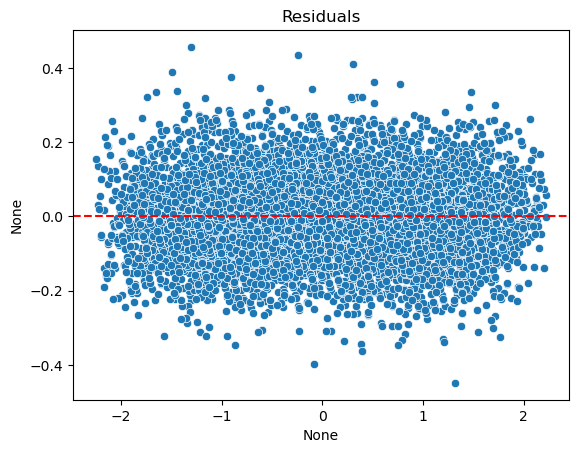

In [ ]:
# check for homogeneity of variance (homoscedasticity) here
sns.scatterplot(x=test_results.fittedvalues, y=test_results.resid)
plt.axhline(0, color='red', linestyle='dashed')
plt.title('Residuals');

**Does the assumption of homoscedasticity hold for your data? Why or why not?**

The plot of fitted values vs residuals is basically a big rectangle, so there is no relationship here, so the assumption of homogeneity of variance holds.

### 3. Features should be independent

If your features are not independent it can cause big problems in the coefficients of the linear regression. Google how to check this! Then run at least one test for feature independence.

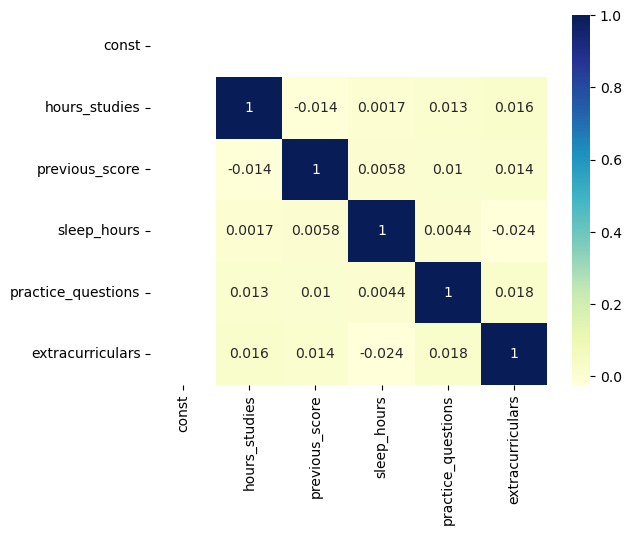

In [ ]:
# check for independence here
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu');

**Does the assumption of independence hold for you data? Why or why not?**

The correlations between features are very low. Thus, the assumption of independence holds!

### Are the results trustworthy?

**ANSWER THE QUESTION HERE**

None of the assumptions for linear regression are violated, so the results of our hypothesis test are trustworthy.

# Prediction

We already fit a model, and we can use it for prediction, too! Since it's already fit, we just need to generate predictions. Since this is regression and not classification (the target is a continuous floating point number, not a category), all it takes is `model.predict(X_test)`. However, you need to scale and encode the test set first! To do this, use the same `StandardScaler` you used for the training data, but instead of fit_transform, just use the `transform` function.

In [ ]:
# scale and encode the test set. Use the SAME scaler and encoding method that you used for the training data!
test_set = pd.concat([X_test, y_test], axis=1)
test_scaled = scaler.transform(test_set.select_dtypes('number'))
test_scaled = pd.DataFrame(test_scaled, columns=test_set.select_dtypes('number').columns,
                           index=test_set.index)
test_scaled['extracurriculars'] = [1 if i.lower() == 'yes' else 0 for i in test_set['extracurriculars']]
test_scaled

,hours_studies,previous_score,sleep_hours,practice_questions,performance,extracurriculars
345,-0.764205,1.009294,0.861681,1.540231,0.610369,0
5052,-1.534038,0.259141,-1.499494,-1.594213,-0.170362,0
2318,0.005629,-0.837235,0.861681,-0.549398,-0.690850,1
8106,0.775463,1.009294,0.861681,-0.897670,1.234954,1
208,-0.379288,-1.298867,-0.909200,-1.245941,-1.471581,1
...,...,...,...,...,...,...
2771,0.775463,1.240110,0.861681,0.843688,1.234954,0
4390,1.545297,1.528630,0.271388,-0.201127,1.963637,0
393,0.775463,-0.202491,-0.318906,0.843688,0.089882,0
7820,1.545297,-1.010347,-0.909200,-0.201127,-0.482655,1


In [ ]:
# check the description of the test set. It's okay if the mean isn't zero and the standard deviation isn't one.
test_scaled.describe()

,hours_studies,previous_score,sleep_hours,practice_questions,performance,extracurriculars
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.014483,-0.018299,-0.028482,0.010100,-0.012576,0.493000
std,0.983139,1.003709,1.004954,0.993015,0.999885,0.500076
min,-1.534038,-1.702795,-1.499494,-1.594213,-2.252312,0.000000
25%,-0.764205,-0.894939,-0.909200,-0.897670,-0.794947,0.000000
50%,0.005629,-0.029379,0.271388,0.147145,-0.014216,0.000000
75%,0.775463,0.893886,0.861681,0.843688,0.766515,1.000000
max,1.545297,1.701742,1.451975,1.540231,2.327978,1.000000


In [ ]:
# generate predictions on the test set
X_test = test_scaled.drop('performance', axis=1)
y_test = test_scaled['performance']

X_test = sm.add_constant(X_test)

y_pred = test_results.predict(exog=X_test)

## Check Prediction Accuracy

There are a bunch of metrics that you might use to check the accuracy of a regression like this. Google it and read about a few!

I want us to look at the **R-squared**, the **RMSE**, the **MAE**, and the **Correlation** between predicted and actual values.
Print those values and also make a visualization of the predicted vs. true values.

In [ ]:
# import what you need
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr

In [ ]:
# print metrics here
rsq = r2_score(y_pred, y_test)
print(f'The Out-of-Sample R-Squared of the model is {rsq:.4f}')
rmse = root_mean_squared_error(y_pred, y_test)
print(f'The Out-of-Sample RMSE is {rmse:.4f}')
mae = mean_absolute_error(y_pred, y_test)
print(f'The Out-of-Sample MAE is {mae:.4f}')
spearman_correlation = spearmanr(y_pred, y_test)
print(f'The Out-of-Sample Correlation is {spearman_correlation.statistic:.4f}')

The Out-of-Sample R-Squared of the model is 0.9882
The Out-of-Sample RMSE is 0.1082
The Out-of-Sample MAE is 0.0861
The Out-of-Sample Correlation is 0.9944


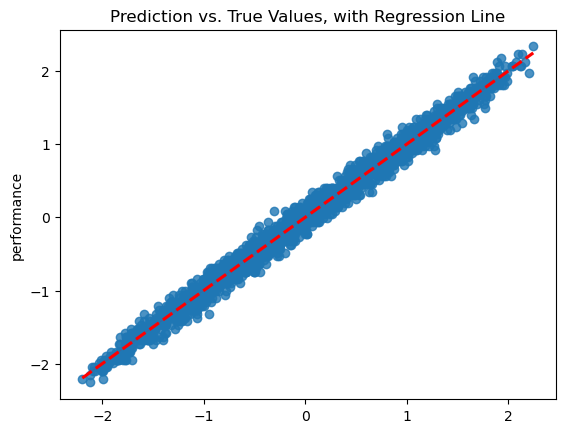

In [ ]:
# plot predictions vs true values
sns.regplot(x=y_pred, y=y_test, line_kws=dict(color="r", linestyle='dashed'))
plt.title('Prediction vs. True Values, with Regression Line');

**In this cell, describe the model's performance.**

This model is remarkably good. The predicted values are very tightly clustered around the true values. It really is shockingly good. The model explains nearly all of the variance, the correlation is super high, and the RMSE/MAE are very low. Incredible.

## Translate the Predictions Back to the Original Scale and Check Metrics Again

We scaled the target variable using the StandardScaler, which means it no longer has the units it original had. We need to rescale the predictions and true values back to the original units and then check the metrics again. Use the same scaler again, but now use `inverse_transform`.

In [ ]:
# inverse transform y_test and the predictions
true_y_test = scaler.inverse_transform(test_scaled.drop('extracurriculars', axis=1))
true_y_test = pd.DataFrame(true_y_test, columns=test_scaled.drop('extracurriculars', axis=1).columns, index=y_test.index)
pred_y_df = test_scaled.drop(['extracurriculars', 'performance'], axis=1)
pred_y_df['performance'] = y_pred
pred_y_df = scaler.inverse_transform(pred_y_df)
pred_y_df = pd.DataFrame(pred_y_df, columns=true_y_test.columns, index=y_pred.index)

true_y_test = true_y_test['performance']
pred_y_test = pred_y_df['performance']

In [ ]:
# redo the metrics here
# print metrics here
rsq = r2_score(pred_y_test, true_y_test)
print(f'The Out-of-Sample R-Squared of the model is {rsq:.4f}')
rmse = root_mean_squared_error(pred_y_test, true_y_test)
print(f'The Out-of-Sample RMSE is {rmse:.4f}')
mae = mean_absolute_error(pred_y_test, true_y_test)
print(f'The Out-of-Sample MAE is {mae:.4f}')
spearman_correlation = spearmanr(pred_y_test, true_y_test)
print(f'The Out-of-Sample Correlation is {spearman_correlation.statistic:.4f}')

The Out-of-Sample R-Squared of the model is 0.9882
The Out-of-Sample RMSE is 2.0786
The Out-of-Sample MAE is 1.6538
The Out-of-Sample Correlation is 0.9944


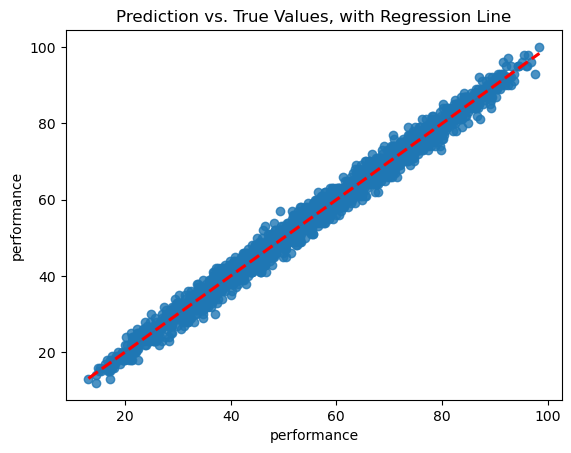

In [ ]:
# plot predictions vs true values
sns.regplot(x=pred_y_test, y=true_y_test, line_kws=dict(color="r", linestyle='dashed'))
plt.title('Prediction vs. True Values, with Regression Line');

**How is the model performance on the original scale?**

Model performance should not vary much when returned to the original scale (though the RMSE and MAE will go up, simply because magnitude was bigger on the original scale).